# [5주차] 심화 과제

다양한 형태의 입력을 가지는 LLM 서비스 개발

## 목표
앞으로 본격적인 LLM 서비스를 개발할것이다.
이번 과제에서는 그에 대한 프로토타입을 개발해보며, LLM 서비스 개발에 대한 감을 잡기

아래 서비스중 1개 선택하여 서비스 개발 하기

## 서비스

서비스 1: 논문 요약 LLM 서비스

서비스 2: 코드 리뷰 LLM 서비스

!!선택한 서비스!! **서비스 3: 소비 패턴 기반 패션 추천 LLM 서비스**

서비스 4: 자유 주제

In [11]:
!pip install -qU openai dotenv IPython

In [3]:
import os
import base64
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

print(os.getenv("ENVTEST"))

test


In [4]:
client = OpenAI()

In [15]:
# 이미지 1개 처리
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
# 이미지 여러개 처리
def encode_multiple_images(image_paths):
    encoded_images = []
    for image_path in image_paths:
        encoded_image = encode_image(image_path)
        encoded_images.append(encoded_image)
    return encoded_images

사용자 이미지


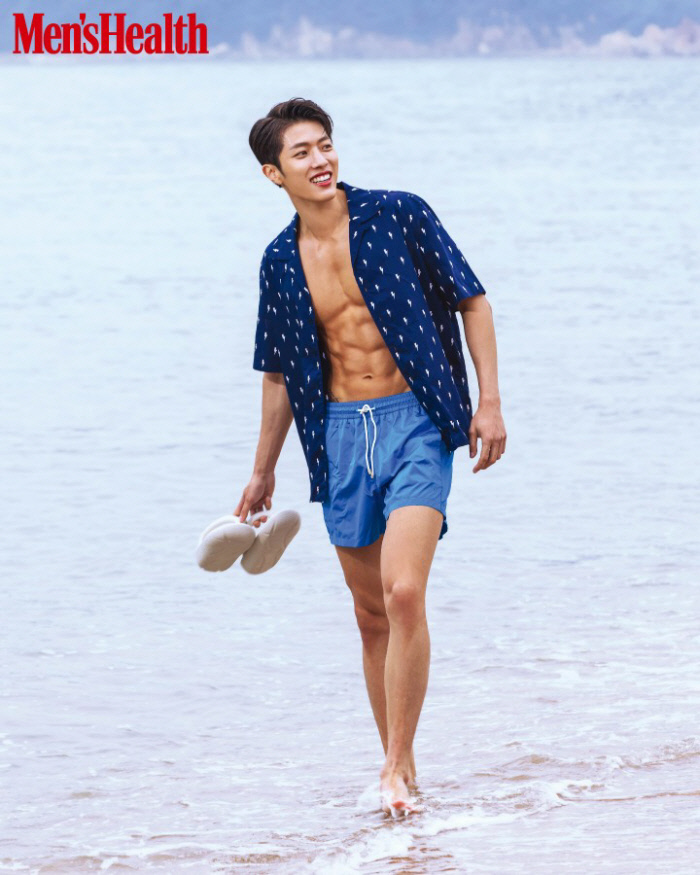

구매 이미지


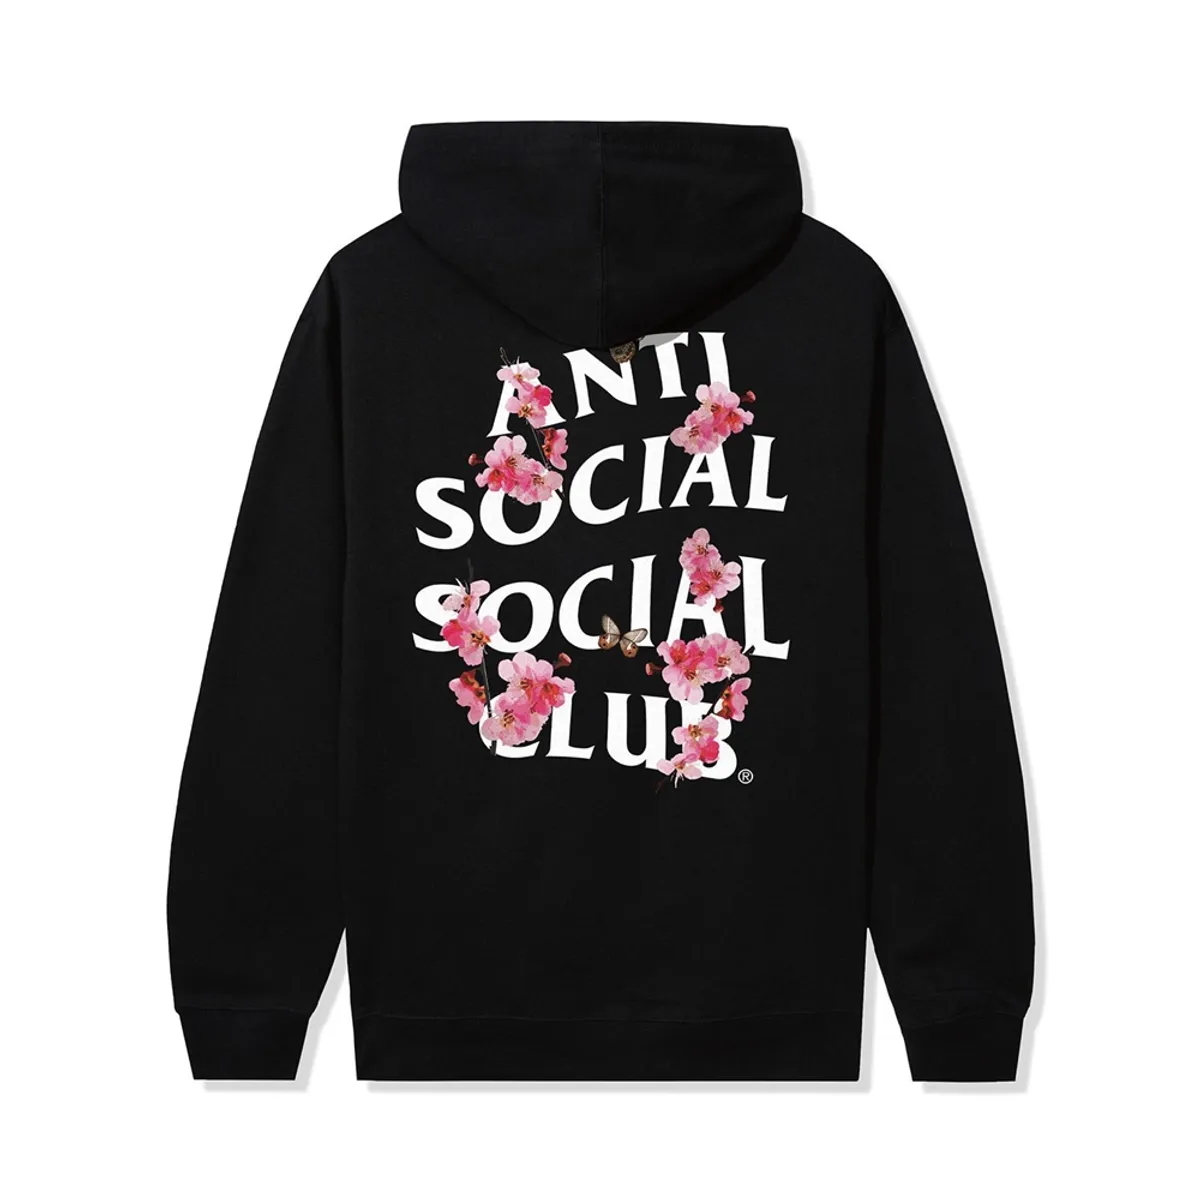

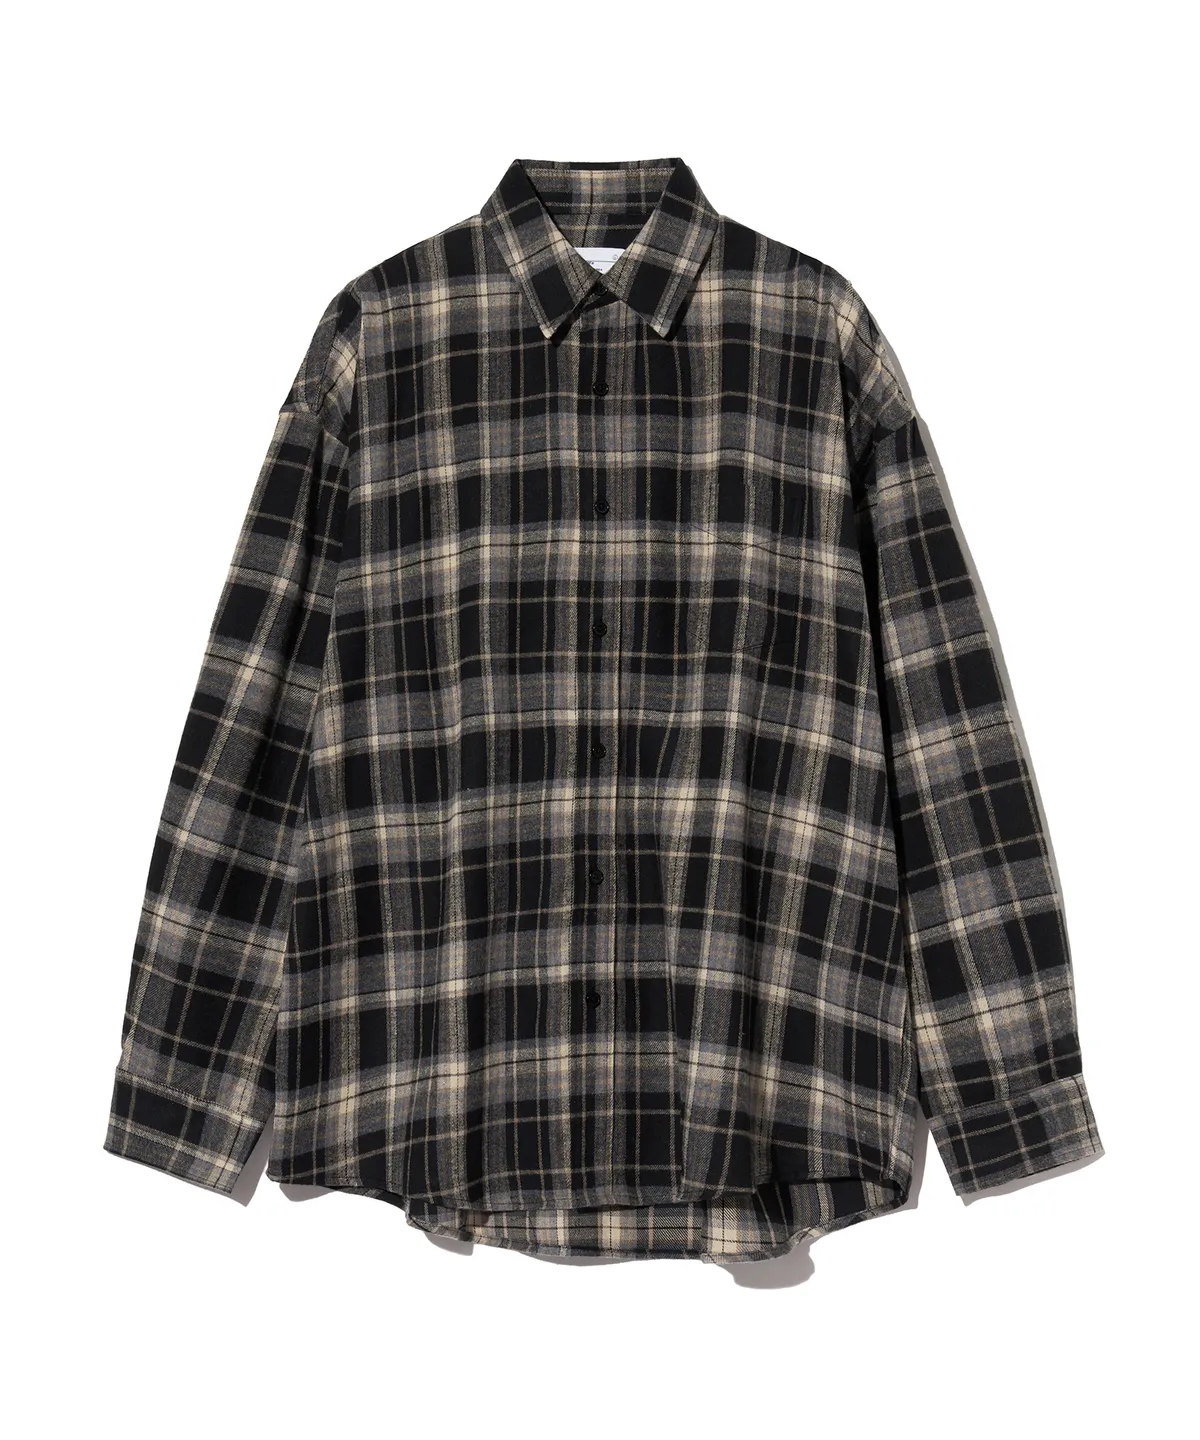

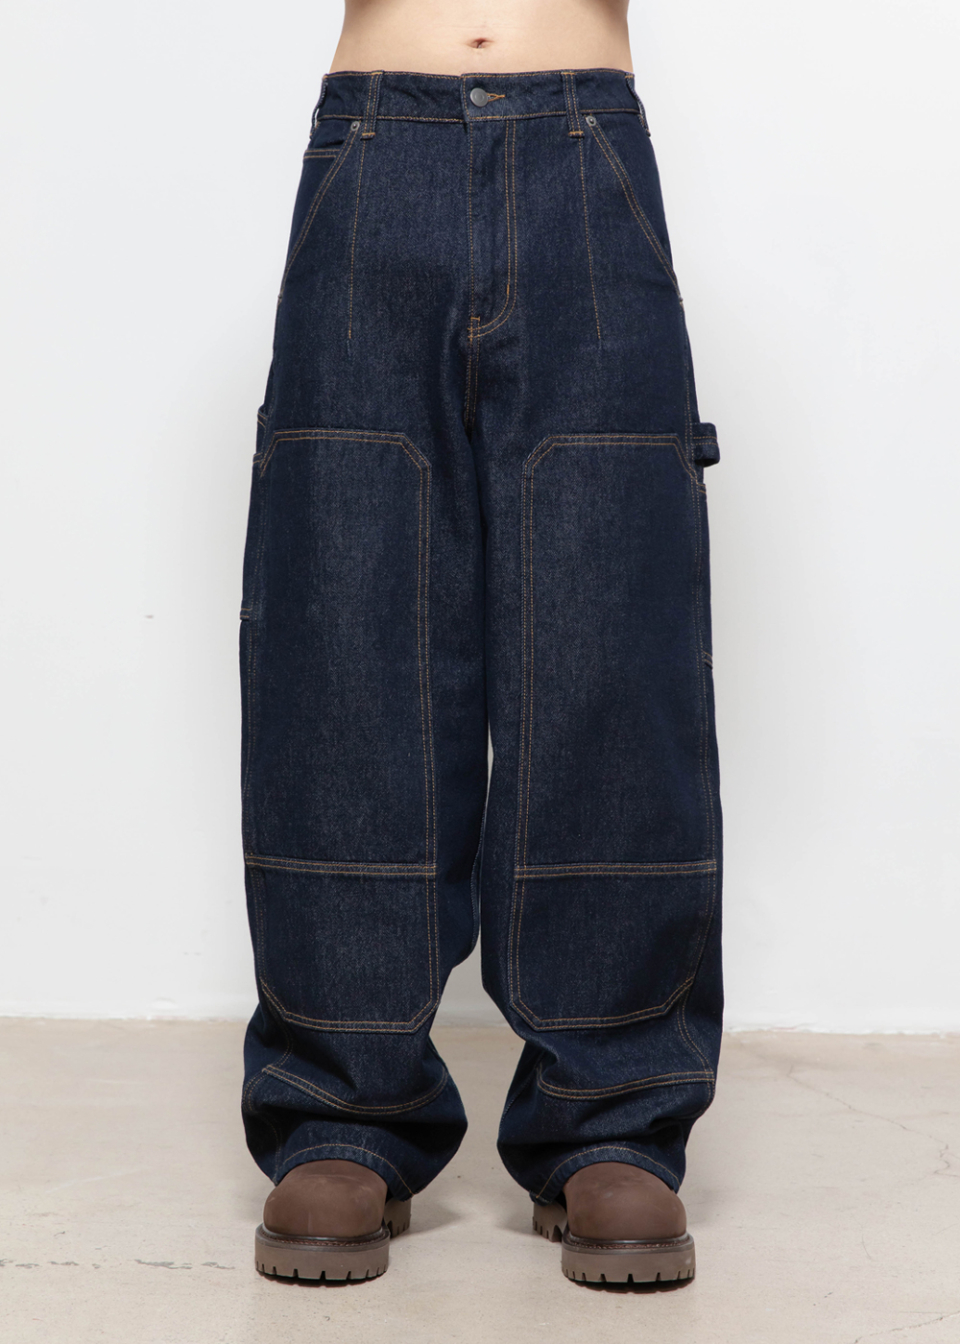

In [66]:
# 사용자 이미지 경로
person_image_path = "./data/seongyeol.jpg" 
# 구매 이미지 경로
purchase_history_paths = [
    "./data/hood1.jpeg",
    "./data/shirts1.jpg",
    "./data/pants1.jpg"
]

# 이미지 보여주기
from IPython.display import Image, display
def display_images(image_paths):
    for image_path in image_paths:
        display(Image(image_path))

print("사용자 이미지")
display_images([person_image_path])
print("구매 이미지")
display_images(purchase_history_paths)

In [67]:
# 인코딩
person_base64 = encode_image(person_image_path)
purchase_history_base64 = encode_multiple_images(purchase_history_paths)

In [81]:
prompt = """
You are a personal fashion stylist AI.

I will provide you with several images:
1.  The first image is a full-body shot of a person whose style we want to analyze.
2.  The subsequent images show fashion items this person has purchased in the past, indicating their style preferences.

Based on the person's overall appearance in the first image and their demonstrated preferences from the purchased items, please recommend 3-5 new fashion items they might enjoy.

For each recommended item, please provide:
1.  **Detailed Description:** Specify the item type, color, style, and material.
2.  **Reasoning:** Explain why this item would suit the person's apparent style (considering both the first image and past purchases).
3.  **Coordination Suggestions:** Suggest how the item could be integrated into their wardrobe or coordinated with the items shown.

Focus on creating a cohesive and personalized style based on all the visual information provided.

Please provide the recommendations in Korean.
"""

In [82]:
# 프롬프트 및 사람 이미지
content = [
    {
        "type": "text",
        "text": prompt
    },
    {
        "type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{person_base64}"}
    }
]

In [83]:
# 구매 상품은 리스트이므로 반복으로 추가
for image_base64 in purchase_history_base64:
    content.append({
        "type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}
    })

In [84]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": content,
        }
    ],
)

In [85]:
from IPython.display import Markdown

response_content = response.choices[0].message.content

# 깔끔하게 출력
formatted_response = response_content.replace(". ", ".\n\n")

display(Markdown(formatted_response))

1.

**화이트 캐주얼 셔츠**
   - **상세 설명:** 얇고 부드러운 면 소재의 화이트 셔츠로, 여유로운 핏이 특징입니다.
   - **추천 이유:** 여름 해변 스타일을 고려하여 시원하고 깔끔한 느낌을 주며, 스트릿 패션에도 잘 어울립니다.
   - **코디 제안:** 청바지나 카고 팬츠와 매치하여 캐주얼한 일상 스타일로 활용할 수 있습니다.

2.

**네이비 린넨 블레이저**
   - **상세 설명:** 얇은 린넨 소재의 네이비 블레이저로, 포멀한 룩에도 어울리며 편안한 착용감을 제공합니다.
   - **추천 이유:** 해변 스타일의 시원함을 유지하면서도, 상의로 구입하신 품목들과 매칭하기 좋습니다.
   - **코디 제안:** 청바지 또는 반바지와 함께 매치하면 여름철 세련된 룩을 완성할 수 있습니다.

3.

**아이보리 컬러의 스니커즈**
   - **상세 설명:** 가벼운 천연 가죽 소재의 아이보리 스니커즈로, 어디에나 쉽게 매치 가능합니다.
   - **추천 이유:** 해변의 편안함과 스트릿 스타일의 요소를 결합하여 다양한 패션에 활용될 수 있습니다.
   - **코디 제안:** 블랙 후디와 청바지 또는 반바지와 매치하여 캐주얼하게 연출할 수 있습니다.

4.

**카키 컬러의 숏 팬츠**
   - **상세 설명:** 기능성 소재의 카키 숏 팬츠로, 여름철 편안하고 시원한 착용감을 제공합니다.
   - **추천 이유:** 해변 스타일과 모던 스트릿 패션 모두에 잘 어울리며, 활동성을 강조합니다.
   - **코디 제안:** 플란넬 셔츠와 함께 매치하면 캐주얼하면서도 감각적인 룩을 연출할 수 있습니다.

5.

**데님 청재킷**
   - **상세 설명:** 클래식한 디자인의 데님 청재킷으로, 다양하게 레이어링할 수 있습니다.
   - **추천 이유:** 활용도가 높으며, 구입하신 아이템들과도 잘 어울립니다.
   - **코디 제안:** 티셔츠나 후디 위에 레이어드하여 캐주얼하고 멋스러운 스타일을 완성할 수 있습니다.